# Lesson 12 activity: linear algebra & basic statistics

## Learning objectives

This activity will help you to:

1. Apply concepts from linear algebra to gain meaningful insight from data
2. Understand statistical data types
3. Use measures of shape to describe distributions
4. Apply covariance and correlation to describe relationships between variables

## Setup

Import the required libraries and load the weather dataset.

In [5]:
# Imports
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns


# Load the weather dataset
df_weather = pd.read_csv('weather.csv')

print(df_weather.info())
print()

print('Weather Description')
print(df_weather.describe().T)
print()

df_weather.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   weather_condition  365 non-null    object 
 1   wind_strength      365 non-null    object 
 2   temperature_c      365 non-null    float64
 3   rainfall_inches    365 non-null    float64
 4   humidity_percent   365 non-null    float64
 5   pressure_hpa       365 non-null    float64
dtypes: float64(4), object(2)
memory usage: 17.2+ KB
None

Weather Description
                  count         mean        std    min      25%      50%  \
temperature_c     365.0     5.753425   7.720141  -10.0     0.70     5.70   
rainfall_inches   365.0     0.303699   0.311469    0.0     0.08     0.21   
humidity_percent  365.0    66.182740  18.232318   23.4    53.90    66.80   
pressure_hpa      365.0  1012.346301   7.437610  983.7  1007.50  1013.20   

                     75%      max  
temperature_c   

,weather_condition,wind_strength,temperature_c,rainfall_inches,humidity_percent,pressure_hpa
0,Sunny,Light Breeze,8.2,0.13,48.8,1016.5
1,Snowy,Gale,1.6,0.29,89.6,1009.4
2,Rainy,Strong Wind,7.3,0.01,100.0,1003.3
3,Cloudy,Light Breeze,21.6,0.62,49.3,1006.9
4,Sunny,Calm,12.0,1.09,38.6,1016.0


## Exercise 1: linear algebra - finding similar days

**Objective**: Apply concepts from linear algebra to gain meaningful insight from data.

In linear algebra, we can treat each row of data as a vector and measure how similar different vectors are. This is useful for finding patterns - for example, finding days with similar weather conditions.

**Tasks**:

1. Select only the numeric columns from the dataset: `temperature_c`, `rainfall_inches`, `humidity_percent`, and `pressure_hpa`

2. Extract the **first row** (day 0) as a reference vector

3. For each row in the dataset, calculate the **cosine similarity** to the first row using:
   $$\text{similarity} = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|}$$
   - You can use `np.dot()` for the dot product
   - You can use `np.linalg.norm()` to calculate vector magnitudes
   
4. Add the similarity scores as a new column to the dataframe

5. **Sort** the dataframe by similarity (highest to lowest) so the most similar days to day 0 appear first

6. Display the **top 10 most similar days** including their similarity scores and weather conditions

7. **Interpret**: Look at the top similar days - do they have similar temperature, humidity, pressure values? Does this make sense?

In [6]:
# Your code here

print('1. Select only the numeric columns from the dataset')
numeric_columns = df_weather[['temperature_c', 'rainfall_inches', 'humidity_percent', 'pressure_hpa']].copy()
print(numeric_columns.head())
print(f'Shape: {numeric_columns.shape}')
print()


# We need to convert row from data frame to a vector, so use to_numpy
print('2. Extract the first row (day 0) as a reference vector')
print()

first_row = numeric_columns.iloc[0].to_numpy()

print(f'Numeric Columns Type: {type(numeric_columns)}')
print(f'numeric_columns.iloc[0] Type: {type(numeric_columns.iloc[0])}')
print(f'First Row Shape:{first_row.shape}')
print(f'First Row Type:{type(first_row)}')
print()

# For numpy cosine similarity we need the noramlized 1st row
# Calculates magnitude (length) of reference vector
# Formula: √(a₁² + a₂² + a₃² + a₄²)
# Example: [3,4] has norm = √(9+16) = 5
norm_ref = np.linalg.norm(first_row)
#print(f'norm_ref:{norm_ref}')

# cosine_similarity needs 2d vector
first_row = numeric_columns.iloc[0].to_numpy().reshape(1, -1)
print(first_row.shape)
print(type(first_row))

print()

print('3. For each row in the dataset, calculate the cosine similarity to the first row using:')
print()

all_rows = numeric_columns.to_numpy()


# sklearn has method that already does this for you if you want
# 2 ways to do this:
# 
# 1. use cosine_similarity  imported fro sklearn
#
sklearn_similarities = cosine_similarity(first_row, all_rows).flatten()

print('Cosine similarities using sklearn')
print(sklearn_similarities.shape)
print(sklearn_similarities[:10])
print(type(sklearn_similarities))

# 
# 2. use numpy
#

# Calculate cosine similarity for each row
# Returns cosine similarity - the dot product divided by product of magnitudes
# 
# This normalizes the dot product to a value between -1 and +1
# Formula: cos(θ) = (A·B) / (||A|| × ||B||)
# Result of 1 = identical direction, 0 = perpendicular, -1 = opposite
# 
# 
# In plain English:
# This function measures how similar two vectors are in direction, ignoring their magnitude. It returns a number between -1 and 1.
def cosine_sim(row):
    
    # Calculates dot product - multiplies corresponding elements and sums them
    # Example: [1,2,3] · [4,5,6] = (1×4) + (2×5) + (3×6) = 32
    # Measures how aligned the two vectors are
    dot_product = np.dot(first_row, row)
    #print(f'dot_product:{dot_product}')
    
    # Calculates magnitude (length) of current row vector
    # Same calculation as above, but for the input row
    norm_row = np.linalg.norm(row)
    #print(f'norm_row{norm_row}')
    
    # Divide dot product by norm ref * norm current row
    return dot_product / (norm_ref * norm_row)

second_row = numeric_columns.iloc[0].to_numpy()
cos_result = cosine_sim(second_row)
print(cos_result)

# Cant do lambdas on numpyd
cos_similarity_results = numeric_columns.apply(lambda row: cosine_sim(row.to_numpy()), axis=1)
print(cos_similarity_results.shape)
print(cos_similarity_results)
print(type(cos_similarity_results))

print('4. Add the similarity scores as a new column to the dataframe')
print()
numeric_columns['sklearn_similarities'] = sklearn_similarities
numeric_columns['cos_similarity_results'] = cos_similarity_results
print('Unsorted Data')
print(numeric_columns.head(10))
print()

print('5. Sort the dataframe by similarity (highest to lowest) so the most similar days to day 0 appear first')
print()
numeric_columns.sort_values(by='cos_similarity_results', ascending=False, inplace=True)
print('Data sorted by cosine similarities')
print(numeric_columns.head(10))

# Adjust display
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)


# Top 10 rows sorted by cos
print()
print()
print('Top 10 sorted rowss')
print(numeric_columns.head(10))
print()

print()
print('7:Interpret: Look at the top similar days - do they have similar temperature, humidity, pressure values? Does this make sense?')






#numeric_columns['cosine_similarity'] = similarities
#print(numeric_columns.shape)
#numeric_columns.head()





1. Select only the numeric columns from the dataset
   temperature_c  rainfall_inches  humidity_percent  pressure_hpa
0            8.2             0.13              48.8        1016.5
1            1.6             0.29              89.6        1009.4
2            7.3             0.01             100.0        1003.3
3           21.6             0.62              49.3        1006.9
4           12.0             1.09              38.6        1016.0
Shape: (365, 4)

2. Extract the first row (day 0) as a reference vector

Numeric Columns Type: <class 'pandas.core.frame.DataFrame'>
numeric_columns.iloc[0] Type: <class 'pandas.core.series.Series'>
First Row Shape:(4,)
First Row Type:<class 'numpy.ndarray'>

(1, 4)
<class 'numpy.ndarray'>

3. For each row in the dataset, calculate the cosine similarity to the first row using:

Cosine similarities using sklearn
(365,)
[1.         0.99915648 0.99868049 0.99991011 0.99994258 0.99984274
 0.99994156 0.99915415 0.99949267 0.99882665]
<class 'numpy.nda

### Interpret: Look at the top similar days - do they have similar temperature, humidity, pressure values? Does this make sense?###

The rows do not have similar values in the column slices.</br>
This is expected behaviour.</br>
By taking the dot product of the rows we are in a sense normalizing them in to a single value with similar weights.</br>
No column has more weight than another.</br>
What we are we looking at is a sorting of that normalization.</br>

## Exercise 2: data types and visualization

**Objective**: Understand statistical data types and visualize interactions between variables.

Understanding data types is crucial for choosing appropriate statistical methods and visualizations. In this exercise, you'll identify data types and explore how numeric variables interact with categorical ones.

**Tasks**:

1. **Identify data types**: For `humidity_percent` and `pressure_hpa`, determine what type of data they are:
   - Are they **interval** data (no true zero) or **ratio** data (has true zero)?
   - For each variable, explain your reasoning:
     - Does zero mean "none" or "absence of the quantity"?
     - Are ratios meaningful? (e.g., is 100% humidity "twice" 50% humidity?)
     - Can the value go below zero?

2. **Create visualizations**: Choose an appropriate plot type to show how `humidity_percent` and `pressure_hpa` vary across different `weather_condition` categories
   - Consider options like: box plots, violin plots, bar plots with error bars, or scatter plots with color coding
   - Create **one plot** that effectively shows the relationship between both numeric variables and the weather condition
   - You might use a single plot with subplots, or find a creative way to show all three variables together

3. **Interpret your visualization**:
   - Which weather condition tends to have the highest humidity?
   - Which weather condition tends to have the lowest pressure?
   - Do you see clear differences between weather conditions?
   - Does this pattern make sense from a meteorological perspective?

#### Identify data types: For humidity_percent and pressure_hpa, determine what type of data they are: ####

humidity_percent  - type = float64 </br>
**Humidity** is **ratio data.**</br>


pressure_hpa  - type = float64</br>
**Pressure** and **Humidity** are theoretically **ratio data.**</br>
They can have an actual zero value </br>
Zero would be the absence of pressure; a vaccuum. </br>
Never really have zero humidity in real world (even deserts) </br>
In reality these conditions would never really exist in the real world, </br>
so they **behaves like interval data** </br>

These features are absolute values and can theoretically be negative (below 0), but not in real world weather.</br>

#### Plot Pressure and Humidity against Weather conditions ####

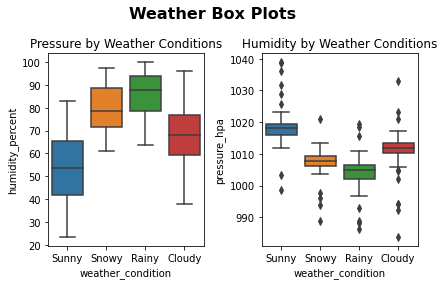

In [7]:
# 
# Create 2 subplots to hold the initlal plots
#

# I need a 1X2 plot to display 10 histograms
fig, axes = plt.subplots(1,2)
axes = axes.flatten()

plt.suptitle('Weather Box Plots', fontsize=16, fontweight='bold')

# Pressure vs Weather Conditions
sns.boxplot(data=df_weather, x='weather_condition', y='humidity_percent', ax=axes[0])
axes[0].set_title('Pressure by Weather Conditions')

# Humidity vs Weather Conditions
sns.boxplot(data=df_weather, x='weather_condition', y='pressure_hpa', ax=axes[1])
axes[1].set_title('Humidity by Weather Conditions')

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()


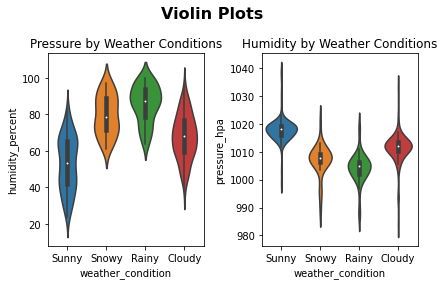

In [8]:
# 
# Create 2 subplots to hold the initlal plots
#

# I need a 1X2 plot to display 10 histograms
fig, axes = plt.subplots(1,2)
axes = axes.flatten()

plt.suptitle('Violin Plots', fontsize=16, fontweight='bold')

# Pressure vs Weather Conditions
sns.violinplot(data=df_weather, x='weather_condition', y='humidity_percent', ax=axes[0])
axes[0].set_title('Pressure by Weather Conditions')

# Humidity vs Weather Conditions
sns.violinplot(data=df_weather, x='weather_condition', y='pressure_hpa', ax=axes[1])
axes[1].set_title('Humidity by Weather Conditions')

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()


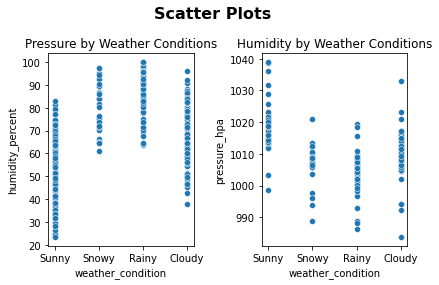

In [9]:
# 
# Create 2 subplots to hold the initlal plots
#

# I need a 1X2 plot to display 10 histograms
fig, axes = plt.subplots(1,2)
axes = axes.flatten()

plt.suptitle('Scatter Plots', fontsize=16, fontweight='bold')

# Pressure vs Weather Conditions
sns.scatterplot(data=df_weather, x='weather_condition', y='humidity_percent', ax=axes[0])
axes[0].set_title('Pressure by Weather Conditions')

# Humidity vs Weather Conditions
sns.scatterplot(data=df_weather, x='weather_condition', y='pressure_hpa', ax=axes[1])
axes[1].set_title('Humidity by Weather Conditions')

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()


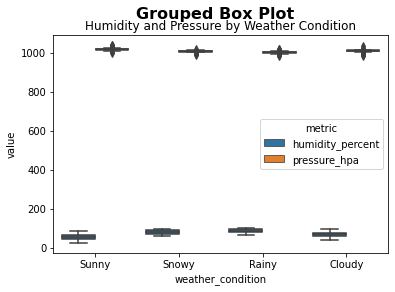

In [10]:
# Try a groupled box plot first

# Need to reshape data first
# melt pivots the data set
df_weather_melted = df_weather.melt(id_vars='weather_condition', 
                    value_vars=['humidity_percent', 'pressure_hpa'],
                    var_name='metric', value_name='value')


plt.suptitle('Grouped Box Plot', fontsize=16, fontweight='bold')

sns.boxplot(x='weather_condition', y='value', hue='metric', data=df_weather_melted)
plt.title('Humidity and Pressure by Weather Condition')
plt.show()

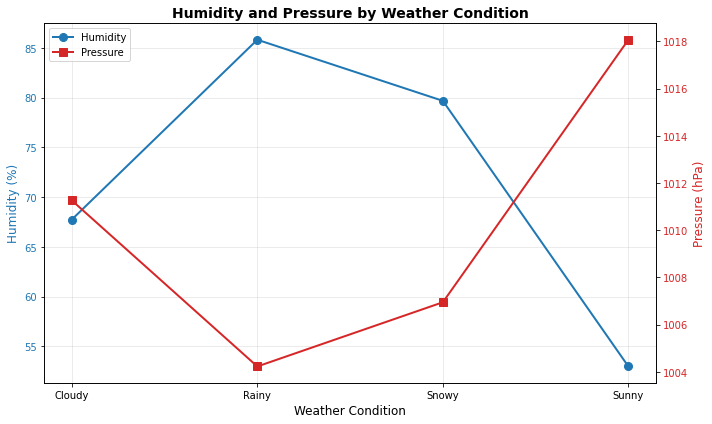

In [11]:
# Group by weather condition and calculate means
grouped = df_weather.groupby('weather_condition')[['humidity_percent', 'pressure_hpa']].mean()

# Create figure
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot humidity on left y-axis
color = 'tab:blue'
ax1.set_xlabel('Weather Condition', fontsize=12)
ax1.set_ylabel('Humidity (%)', color=color, fontsize=12)
line1, = ax1.plot(grouped.index, grouped['humidity_percent'], color=color, marker='o', 
                  linewidth=2, markersize=8, label='Humidity')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Create second y-axis for pressure
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Pressure (hPa)', color=color, fontsize=12)
line2, = ax2.plot(grouped.index, grouped['pressure_hpa'], color=color, marker='s', 
                  linewidth=2, markersize=8, label='Pressure')
ax2.tick_params(axis='y', labelcolor=color)

# Title
plt.title('Humidity and Pressure by Weather Condition', fontsize=14, fontweight='bold')

# Combined legend
ax1.legend(handles=[line1, line2], loc='upper left')

plt.tight_layout()
plt.show()


#### ** Interpret your visualization: ** ####

#####    **Which weather condition tends to have the highest humidity?** #####
Rain and Snow </br>
#####    **Which weather condition tends to have the lowest pressure? #####
Rain and Snow </br>
#####    **Do you see clear differences between weather conditions?** #####
Yes </br>
#####    **Does this pattern make sense from a meteorological perspective?** #####
Yes<br/>
moisture => Higher Humidlity, Lower Pressure
cloudy/sunny => Lower Humidity (usually), Higher Pressure

## Exercise 3: analyzing distribution skewness

**Objective**: Use measures of shape to describe distributions.

Skewness describes the asymmetry of a distribution. Understanding skewness helps you choose appropriate statistical methods and understand the nature of your data.

**Tasks**:

1. Calculate the **skewness** for all four numeric variables:
   - `temperature_c`
   - `rainfall_inches`
   - `humidity_percent`
   - `pressure_hpa`

2. Identify which variable has:
   - The **greatest skew** (furthest from zero)
   - The **least skew** (closest to zero, most symmetric)
   - Print these findings with their skewness values

3. Create **two histograms** (side by side) showing only these two variables:
   - One histogram for the most skewed variable
   - One histogram for the least skewed variable
   - For each histogram:
     - Add vertical lines showing the mean (in red) and median (in green)
     - Include the skewness value in the title
     - Use appropriate bin sizes

4. **Interpret** your findings:
   - Why does the most skewed variable have the sign that it does? (Think about the real-world meaning)
   - For the skewed distribution, how do the mean and median compare? Why?
   - What does the skewness tell you about typical vs extreme values for this variable?
   - Why is the least skewed variable more symmetric?
   - **Bonus**: Explain why skewness matters when choosing between mean and median as a measure of central tendency.

### ** Analyzing Distributions ** ###
 
## ** Plot Histograms to view distributions ** ##

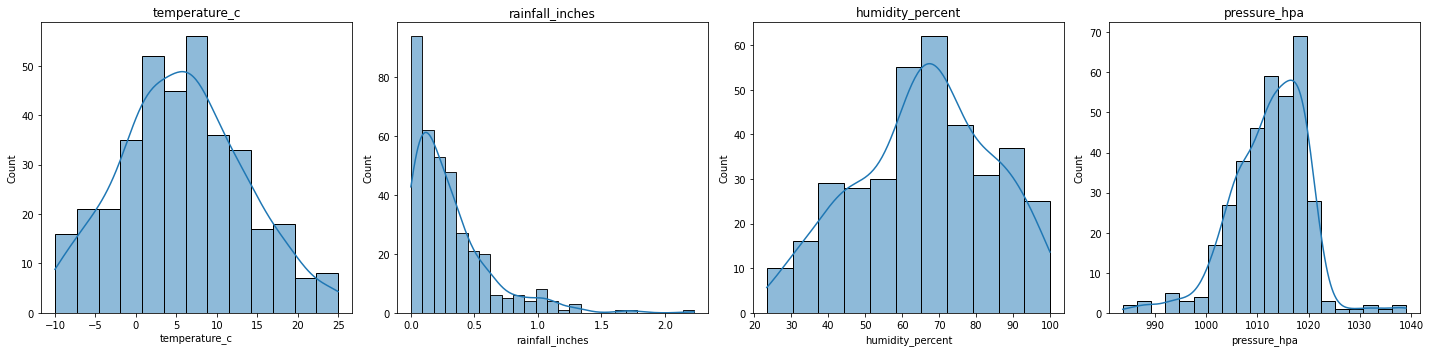

In [12]:
numeric_columns = df_weather[['temperature_c', 'rainfall_inches', 'humidity_percent', 'pressure_hpa']].copy()
n_cols = len(numeric_columns)

# I need a 2X2 plot to display 4 histograms
fig, axes = plt.subplots(1,4, figsize=(20,5))
axes = axes.flatten()

# Iterate over each numeric column and plot a historbram
for i, col in enumerate(numeric_columns):
    sns.histplot(data=df_weather, x=col, ax=axes[i], kde=True)
    axes[i].set_title(col)

# Hide the blank/empty graphs
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()   

### **Analyze the Skewness** ###

In [13]:
# For all numeric columns at once
numeric_columns = ['temperature_c', 'rainfall_inches', 'humidity_percent', 'pressure_hpa']
skewness = df_weather[numeric_columns].skew()
skewness.index = numeric_columns
print(f'skewness type: {type(skewness)}')

print('Skewnesses for Numeric Data')
print(skewness)
print()

print(f'The greatest skew (furthest from zero): {skewness.idxmax()} = {skewness.max():.2f}')
print(f'The least skew (closest to zero, most symmetric: {skewness.idxmin()} = {skewness.min():.2f}')

skewness type: <class 'pandas.core.series.Series'>
Skewnesses for Numeric Data
temperature_c       0.178882
rainfall_inches     2.102548
humidity_percent   -0.207848
pressure_hpa       -0.445160
dtype: float64

The greatest skew (furthest from zero): rainfall_inches = 2.10
The least skew (closest to zero, most symmetric: pressure_hpa = -0.45


In [16]:
### ** Histograms of Most and Least Skewed Numeric features ** ###

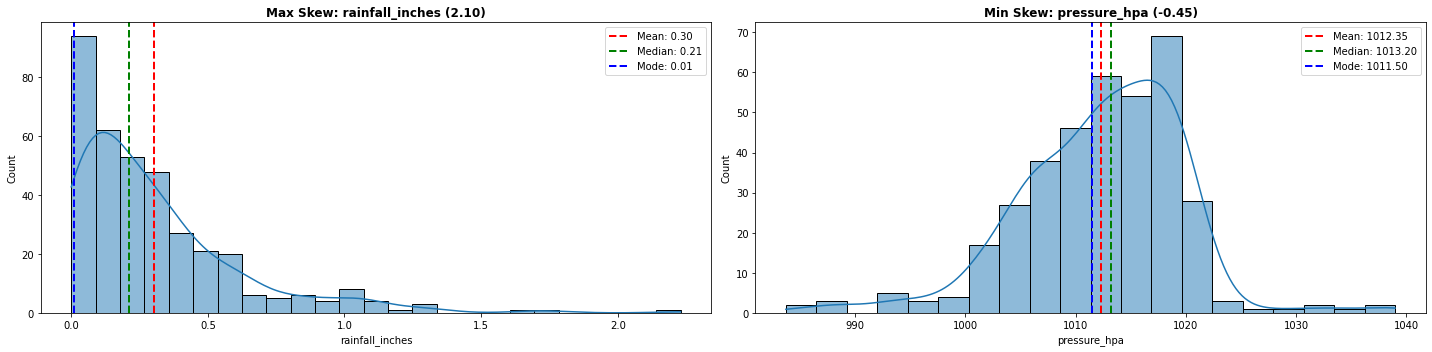

In [15]:
numeric_columns = df_weather[['temperature_c', 'rainfall_inches', 'humidity_percent', 'pressure_hpa']].copy()
n_cols = len(numeric_columns)

# I need a 1X2 plot to display 2 histograms
fig, axes = plt.subplots(1,2, figsize=(20,5))
axes = axes.flatten()

# Most Skewed
max_skew_column = skewness.idxmax()
sns.histplot(data=df_weather, x=max_skew_column, ax=axes[0], kde=True, bins='auto')
axes[0].set_title(f'Max Skew: {skewness.idxmax()} ({skewness.max():.2f})', fontweight='bold')

# Calculate statistics
mean_val = df_weather[skewness.idxmax()].mean()
median_val = df_weather[skewness.idxmax()].median()
mode_val = df_weather[skewness.idxmax()].mode()[0]  # mode() returns a Series, take first value

# Plot mean, meadian and mode
axes[0].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
axes[0].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
axes[0].axvline(mode_val, color='blue', linestyle='--', linewidth=2, label=f'Mode: {mode_val:.2f}')

axes[0].legend()
    
    
# Least Skewed
max_skew_column = skewness.idxmin()
sns.histplot(data=df_weather, x=max_skew_column, ax=axes[1], kde=True, bins='auto')
axes[1].set_title(f'Min Skew: {skewness.idxmin()} ({skewness.min():.2f})', fontweight='bold')

# Calculate statistics
mean_val = df_weather[skewness.idxmin()].mean()
median_val = df_weather[skewness.idxmin()].median()
mode_val = df_weather[skewness.idxmin()].mode()[0]  # mode() returns a Series, take first value

# Plot mean, meadian and mode
axes[1].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
axes[1].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
axes[1].axvline(mode_val, color='blue', linestyle='--', linewidth=2, label=f'Mode: {mode_val:.2f}')

axes[1].legend()


# Make plots more readable and add space
plt.tight_layout(h_pad=5)
plt.show()   

#### **Interpret your findings: * ####

Why does the most skewed variable have the sign that it does? (Think about the real-world meaning) </br>
Right skewed has a postive value for skew</br>
We have fewer instances of days with heavy rainfall > 1 inch, so the line tends towards 0 the further you go to the right which give us the right skew</br>
</br>
For the skewed distribution, how do the mean and median compare? Why?</br>
For Right Skewed Distribution</br>
Mode - furthest to the left of the plot, near 0</br>
Median - is to the right of the peak (not far from it)</br>
Mean - is further to the right, further down the slope</br>
Mean > Median > Mode</br>
</br>
Other plot is a kind of combination of "Left Skewed" - 'Normalized'</br>
Mildly Left Skewed </br>
Mode - furthest to the left of the plot, near on the upward slope to the peak</br>
Median - is to the right of Mode, still before the peak</br>
Mean - is further to the right, further to the right of Mean before the peak</br>
Median > Mean > Mode</br>
</br>
What does the skewness tell you about typical vs extreme values for this variable?</br>
Extreme values (Heavy rainfall events) pull the mean toward the tail, but the median ignores extremes and stays in the middle of the data</br>
</br>
Why is the least skewed variable more symmetric?</br>
Pressure doesn't have as wild swings/extremes as something like rainfall</br>
It tends to stay relatively stable with minor variations </br>
</br>
Bonus: Explain why skewness matters when choosing between mean and median as a measure of central tendency.</br>
Central Tendancy - single value that represents the most typical value of your dataset</br>
With a more pronounced skew, you end up pulling the mean value further away from the median making it appear lopsided.</br>
Large pronounced skew - choose median (ignores outliers)</br>
Less skew/more normal distribution - choose mean (or median, toss up??)<br>
</br>
</br>



## Exercise 4: exploring relationships with correlation

**Objective**: Apply covariance and correlation to describe relationships between variables.

Weather variables often have meaningful relationships. Some pairs of variables are strongly related while others have little relationship at all.

**Tasks**:

1. Calculate the **correlation matrix** for all four numeric variables:
   - `temperature_c`
   - `rainfall_inches`
   - `humidity_percent`
   - `pressure_hpa`

2. Identify the pair of variables with:
   - The **strongest correlation** (highest absolute value, whether positive or negative)
   - The **weakest correlation** (closest to zero)
   - Print both pairs with their correlation coefficients
   - Note whether the strongest correlation is positive or negative

3. Create **two scatter plots** (side by side or in separate figures):
   - One for the strongest correlation pair
   - One for the weakest correlation pair
   - For each plot:
     - Include the correlation coefficient in the title
     - Add appropriate axis labels

4. **Interpret** your findings:
   - What is the strongest relationship? Does it make meteorological sense?
   - Is this strongest correlation positive or negative? What does that mean in real-world terms?
   - What is the weakest relationship? Why might these variables have little correlation?
   - Compare the scatter plots: How does the pattern differ between strong and weak correlations?
   - Based on the correlation strengths, which relationship is more predictable?

## Correlation Matrices ##

Correlation Matrix Type: <class 'pandas.core.frame.DataFrame'>


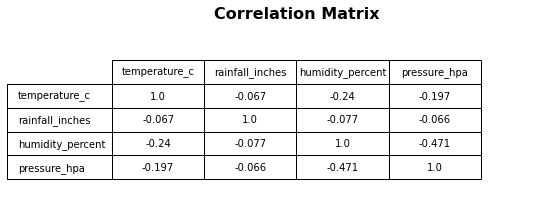

The strongest correlation (highest absolute value, whether positive or negative)
Strongest correlation: 0.471 Between: humidity_percent and pressure_hpa


The weakest correlation (closest to zero)
Weakest correlation: 0.066 Between: rainfall_inches and pressure_hpa


Note whether the strongest correlation is positive or negative
Strongest Correlation Value: -0.471 (negative)
Between: humidity_percent and pressure_hpa



In [24]:
correlation_matrix = df_weather[['temperature_c', 'rainfall_inches', 'humidity_percent', 'pressure_hpa']].corr()
print(f'Correlation Matrix Type: {type(correlation_matrix)}')
# Create figure
fig, ax = plt.subplots(figsize=(8, 3))
ax.axis('tight')
ax.axis('off')

# Create table
table = ax.table(cellText=correlation_matrix.values.round(3),
                 rowLabels=correlation_matrix.index,
                 colLabels=correlation_matrix.columns,
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.15] * len(correlation_matrix.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2)

# Add title
plt.title('Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()



print('The strongest correlation (highest absolute value, whether positive or negative)')

# UnStack 2D to 1D series and get absolute values, excluding diagonal
corr_pairs = correlation_matrix.abs().unstack()
corr_pairs = corr_pairs[corr_pairs < 1]  # Remove diagonal (1.0 values)

# Find maximum
strongest = corr_pairs.max()
strongest_pair = corr_pairs.idxmax()

print(f"Strongest correlation: {strongest:.3f} Between: {strongest_pair[0]} and {strongest_pair[1]}")
print()
print()
print('The weakest correlation (closest to zero)')
weakest = corr_pairs.min()
weakest_pair = corr_pairs.idxmin()
print(f"Weakest correlation: {weakest:.3f} Between: {weakest_pair[0]} and {weakest_pair[1]}")
print()
print()
print('Note whether the strongest correlation is positive or negative')
strongest_value = correlation_matrix.loc[strongest_pair[0], strongest_pair[1]]

# Determine if positive or negative
direction = "positive" if strongest_value > 0 else "negative"

print(f"Strongest Correlation Value: {strongest_value:.3f} ({direction})")
print(f"Between: {strongest_pair[0]} and {strongest_pair[1]}")

print()


## Correlation Matrices Scatter Plots ##

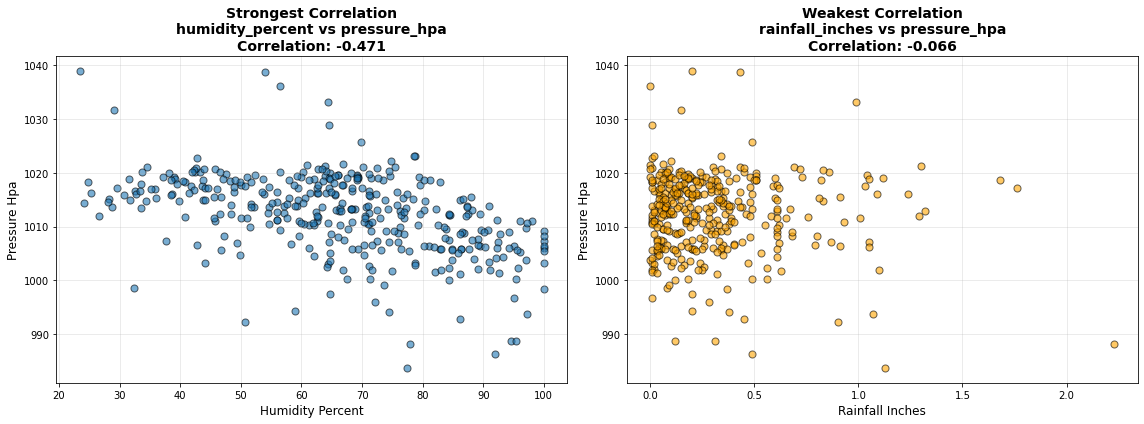

In [25]:
# Calculate correlation matrix
correlation_matrix = df_weather[['temperature_c', 'rainfall_inches', 'humidity_percent', 'pressure_hpa']].corr()

# Get absolute values and flatten (remove diagonal)
corr_abs = correlation_matrix.abs().unstack()
corr_abs = corr_abs[corr_abs < 1]

# Find strongest correlation
strongest_pair = corr_abs.idxmax()
strongest_abs_value = corr_abs.max()
strongest_actual = correlation_matrix.loc[strongest_pair[0], strongest_pair[1]]

# Find weakest correlation
weakest_pair = corr_abs.idxmin()
weakest_abs_value = corr_abs.min()
weakest_actual = correlation_matrix.loc[weakest_pair[0], weakest_pair[1]]

# Create side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Strongest correlation
axes[0].scatter(df_weather[strongest_pair[0]], df_weather[strongest_pair[1]], 
                alpha=0.6, edgecolors='black', s=50)
axes[0].set_xlabel(strongest_pair[0].replace('_', ' ').title(), fontsize=12)
axes[0].set_ylabel(strongest_pair[1].replace('_', ' ').title(), fontsize=12)
axes[0].set_title(f'Strongest Correlation\n{strongest_pair[0]} vs {strongest_pair[1]}\nCorrelation: {strongest_actual:.3f}', 
                  fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Weakest correlation
axes[1].scatter(df_weather[weakest_pair[0]], df_weather[weakest_pair[1]], 
                alpha=0.6, edgecolors='black', s=50, color='orange')
axes[1].set_xlabel(weakest_pair[0].replace('_', ' ').title(), fontsize=12)
axes[1].set_ylabel(weakest_pair[1].replace('_', ' ').title(), fontsize=12)
axes[1].set_title(f'Weakest Correlation\n{weakest_pair[0]} vs {weakest_pair[1]}\nCorrelation: {weakest_actual:.3f}', 
                  fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Interpret Correlation Scatter Plots ##
    What is the strongest relationship? Does it make meteorological sense?
    
    Is this strongest correlation positive or negative? What does that mean in real-world terms?
    
    What is the weakest relationship? Why might these variables have little correlation?
    
    Compare the scatter plots: How does the pattern differ between strong and weak correlations?
    
    Based on the correlation strengths, which relationship is more predictable?
    
